In [1]:
import pandas as pd
import numpy as np

from polynomial_boosting import PolynomialBoostingModel

import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

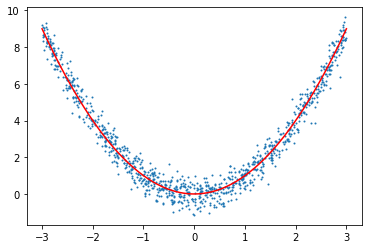

In [2]:
np.random.seed(123)

def f(X):
    return  X**2

N = 1000

X = np.random.uniform(size=(N,1)) * 6 - 3

#model requires that `y` is a matrix and not a vector (contrary to sklearn models)
y = f(X) + np.random.normal(size=(N,1)) * 0.5  

line = np.linspace(-3,3,250)

plt.scatter(X[:,0],y[:,0],s=1)
plt.plot(line,f(line),c="red")

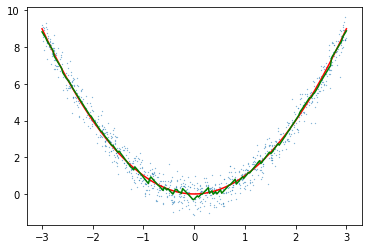

In [3]:
model = PolynomialBoostingModel(0.25, 5.0, 100, 10) #learning rate, #regularization, #n trees, #min_samples_leaf
model.fit(X,y)

preds = model.predict(line.reshape(-1,1)).reshape(-1)

plt.scatter(X[:,0],y[:,0],s=0.05)
plt.plot(line,f(line),c="red")
plt.plot(line,preds,c="green")

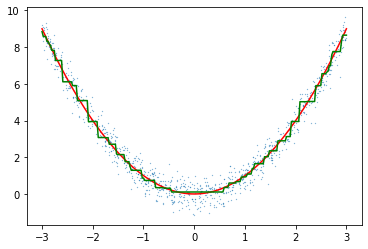

In [4]:
model2 = GradientBoostingRegressor(max_depth=1, n_estimators=100, learning_rate = 0.25)
model2.fit(X,y.reshape(-1))

preds2 = model2.predict(line.reshape(-1,1)).reshape(-1)

plt.scatter(X[:,0],y[:,0],s=0.05)
plt.plot(line,f(line),c="red")
plt.plot(line,preds2,c="green")

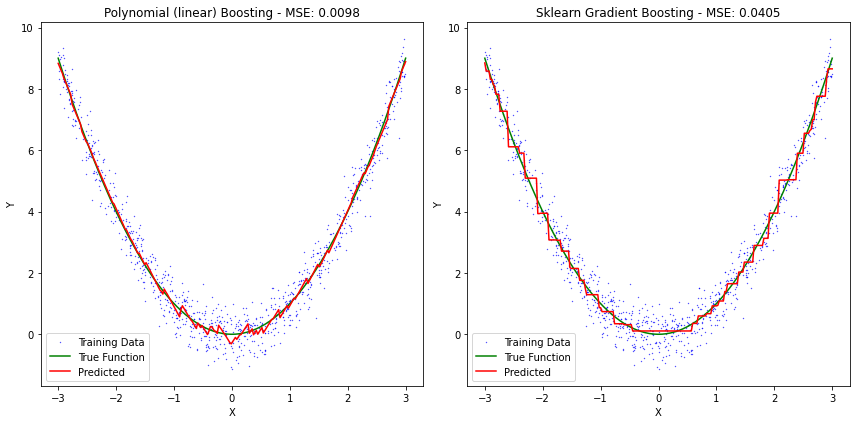

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].scatter(X[:,0], y[:,0], color='blue', label='Training Data', s=0.1)
axes[0].plot(line, f(line), color='green', label='True Function')
axes[0].plot(line, preds, color='red', label='Predicted')
axes[0].set_title('Polynomial (linear) Boosting - MSE: {:.4f}'.format(np.mean((preds-f(line))**2)))
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].legend()

axes[1].scatter(X[:,0], y[:,0], color='blue', label='Training Data', s=0.1)
axes[1].plot(line, f(line), color='green', label='True Function')
axes[1].plot(line, preds2, color='red', label='Predicted')
axes[1].set_title('Sklearn Gradient Boosting - MSE: {:.4f}'.format(np.mean((preds2-f(line))**2)))
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].legend()

plt.tight_layout()

In [6]:
Xd, yd = fetch_california_housing(return_X_y=True)

#small train set, as the model is still quite slow
X_train, X_test, y_train, y_test = train_test_split(Xd, yd, test_size=0.975, random_state=123)


Xm = np.mean(X_train,0).reshape(1,-1)
Xs = np.std(X_train,0).reshape(1,-1)

ym = np.mean(y_train)
ys = np.std(y_train)

X_train = (X_train - Xm) / Xs
y_train = (y_train - ym) / ys

X_test = (X_test - Xm) / Xs

In [7]:
d_model = PolynomialBoostingModel(0.25, 5.0, 100, 10) #learning rate, #regularization, #n trees, #min_samples_leaf
d_model.fit(X_train,y_train.reshape(-1,1))

d_preds = d_model.predict(X_test).reshape(-1) * ys + ym

In [8]:
d_model2 = GradientBoostingRegressor(max_depth=1, n_estimators=100, learning_rate = 0.25)
d_model2.fit(X_train,y_train)

d_preds2 = d_model2.predict(X_test) * ys + ym

In [9]:
np.mean((d_preds-y_test)**2)

0.40442408085558806

In [10]:
np.mean((d_preds2-y_test)**2)

0.4231840786265534

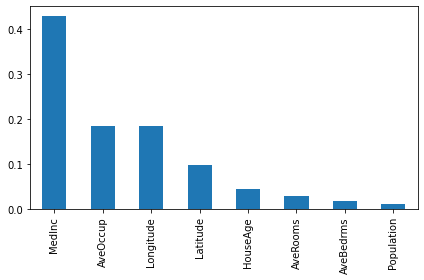

In [11]:
feature_names = fetch_california_housing()["feature_names"]
importances = pd.Series(d_model.get_feature_importances(), index = feature_names)

importances.sort_values(ascending=False).plot(kind="bar")
plt.tight_layout()

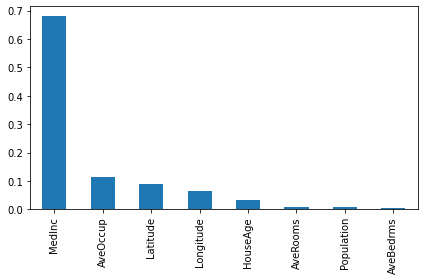

In [12]:
importances2 = pd.Series(d_model2.feature_importances_, index = feature_names)

importances2.sort_values(ascending=False).plot(kind="bar")
plt.tight_layout()